In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [4]:
# Read the dataset
uber = pd.read_csv("uber-raw-data-sep14.csv")
uber

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [20]:
#correctly parsing the date/time column to datetime format
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'])

#creating 'Day', 'Hour', and 'Weekday' columns by extracting from 'Date/Time'
uber['Day'] = uber['Date/Time'].dt.day
uber['Hour'] = uber['Date/Time'].dt.hour
uber['Weekday'] = uber['Date/Time'].dt.weekday
uber 


,Date/Time,Lat,Lon,Base,Day,Hour,Weekday,Trip_Count
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,24133
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,24133
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,24133
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,24133
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,24133
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1,51817
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1,51817
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1,51817
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1,51817


In [21]:
#preparing the dataset by counting the number of trips per hour
uber['Trip_Count'] = uber.groupby(['Hour'])['Hour'].transform('count')
#This line of code above will create a new column Trip_Count that stores the number of trips per hour 
uber 

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday,Trip_Count
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,24133
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,24133
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,24133
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,24133
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,24133
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1,51817
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1,51817
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1,51817
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1,51817


In [23]:
#Feature Selection
#using hour, day, weekday as the features for prediciting the trip count
#features (Hour, Day, Weekday) and target (Trip_Count)
X = uber[['Hour', 'Day', 'Weekday']]
y = uber['Trip_Count']

In [14]:
#Train-Test Split
from sklearn.model_selection import train_test_split

#spliting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#model training
from sklearn.linear_model import LinearRegression
#creating and training the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [16]:
#making predictions on the test set
y_pred = model.predict(X_test) 

In [17]:
#evaluating the model
from sklearn.metrics import mean_squared_error 

In [18]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}") 

Mean Squared Error: 129966481.05299085


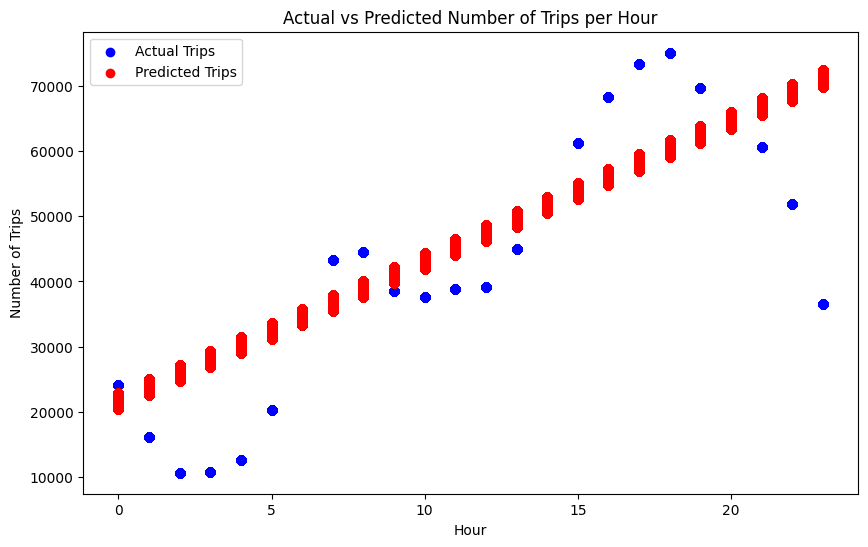

In [19]:
#visualizing the final results
import matplotlib.pyplot as plt
#plotting actual vs predicted trips
plt.figure(figsize=(10,6))
plt.scatter(X_test['Hour'], y_test, color='blue', label='Actual Trips')
plt.scatter(X_test['Hour'], y_pred, color='red', label='Predicted Trips')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Actual vs Predicted Number of Trips per Hour')
plt.legend()
plt.show()  